In [1]:
import datasets
from IPython import embed
import pandas as pd
from datasets import load_dataset, load_dataset_builder
import os
import json
from matplotlib import pyplot as plt
from dataclasses import asdict

configurations = ["cola", "mnli", "mrpc", "qnli", "qqp", "rte", "sst2", "stsb", "wnli"]

processing cola ...


Found cached dataset glue (/nas/home/souratih/.cache/huggingface/datasets/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 8551
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1043
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1063
    })
})


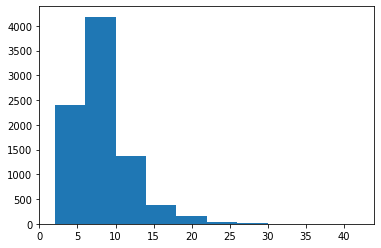

done! -----------------


In [2]:
config = "cola"
print('processing', config, '...')
# store dataset and its information in its respective directory with splits train, val, test
dataset = datasets.load_dataset("glue", config)
print(dataset)
train_df = pd.DataFrame(dataset["train"])
val_df = pd.DataFrame(dataset["validation"])
# make test_df and val_df with ratio 0.2 0.8 from val_df
test_df = val_df.sample(frac=0.2)
val_df = val_df.drop(test_df.index)

info = asdict(load_dataset_builder("glue", config).info)
info["sentence_max_length"] = 20
info["dataset_type"] = "classification"
info["batch_size"] = 256


if not os.path.exists(f"glue_data/{config}"):
    os.makedirs(f"glue_data/{config}")

train_df.to_csv(f"glue_data/{config}/train.csv", index=False)
val_df.to_csv(f"glue_data/{config}/val.csv", index=False)
test_df.to_csv(f"glue_data/{config}/test.csv", index=False)
with open(f"glue_data/{config}/info.json", "w") as f:
    json.dump(info, f)
    

plt.hist(train_df["sentence"].apply(lambda x: len(x.split())))
plt.show()

print('done! -----------------')

processing mnli ...


Found cached dataset glue (/nas/home/souratih/.cache/huggingface/datasets/glue/mnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/5 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 392702
    })
    validation_matched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9815
    })
    validation_mismatched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9832
    })
    test_matched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9796
    })
    test_mismatched: Dataset({
        features: ['premise', 'hypothesis', 'label', 'idx'],
        num_rows: 9847
    })
})


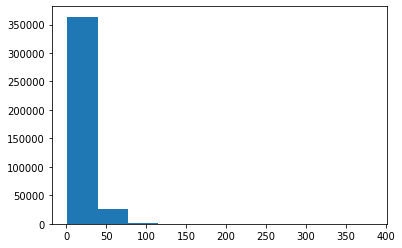

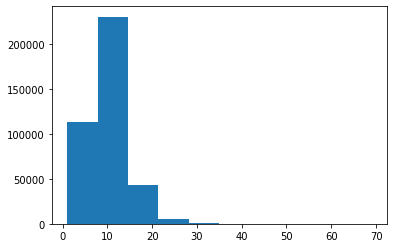

done! -----------------


In [3]:
config = "mnli"
print('processing', config, '...')
# store dataset and its information in its respective directory with splits train, val, test
dataset = datasets.load_dataset("glue", config)
print(dataset)
train_df = pd.DataFrame(dataset["train"])
val_matched_df = pd.DataFrame(dataset["validation_matched"])
val_mismatched = pd.DataFrame(dataset["validation_mismatched"])
# test_matched_df = pd.DataFrame(dataset["test_matched"])
# test_mismatched = pd.DataFrame(dataset["test_mismatched"])

val_df = pd.concat([val_matched_df, val_mismatched], ignore_index=True)
# test_df = pd.concat([test_matched_df, test_mismatched], ignore_index=True)

test_df = val_df.sample(frac=0.2)
val_df = val_df.drop(test_df.index)

# change the name of the column "premise" to "sentence1" and "hypothesis" to "sentence2"
train_df.rename(columns={"premise": "sentence1", "hypothesis": "sentence2"}, inplace=True)
val_df.rename(columns={"premise": "sentence1", "hypothesis": "sentence2"}, inplace=True)
test_df.rename(columns={"premise": "sentence1", "hypothesis": "sentence2"}, inplace=True)

info = asdict(load_dataset_builder("glue", config).info)
info["sentence1_max_length"] = 100
info["sentence2_max_length"] = 30
info["batch_size"] = 256
info["dataset_type"] = "nli"

if not os.path.exists(f"glue_data/{config}"):
    os.makedirs(f"glue_data/{config}")

train_df.to_csv(f"glue_data/{config}/train.csv", index=False)
val_df.to_csv(f"glue_data/{config}/val.csv", index=False)
test_df.to_csv(f"glue_data/{config}/test.csv", index=False)
with open(f"glue_data/{config}/info.json", "w") as f:
    json.dump(info, f)
    
plt.hist(train_df["sentence1"].apply(lambda x: len(x.split())))
plt.show()

plt.hist(train_df["sentence2"].apply(lambda x: len(x.split())))
plt.show()
    

print('done! -----------------')

processing mrpc ...


Found cached dataset glue (/nas/home/souratih/.cache/huggingface/datasets/glue/mrpc/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})


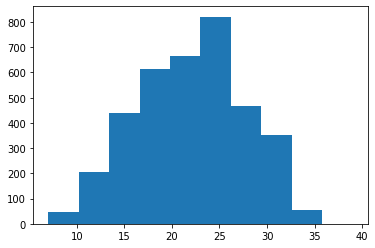

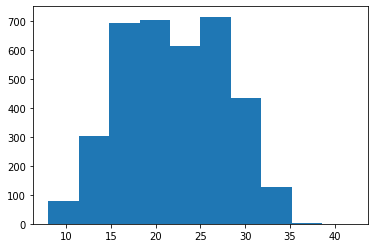

done! -----------------


In [7]:
config = "mrpc"
print('processing', config, '...')
# store dataset and its information in its respective directory with splits train, val, test
dataset = datasets.load_dataset("glue", config)
print(dataset)
train_df = pd.DataFrame(dataset["train"])
val_df = pd.DataFrame(dataset["validation"])
test_df = pd.DataFrame(dataset["test"])


info = asdict(load_dataset_builder("glue", config).info)
info["sentence1_max_length"] = 35
info["sentence2_max_length"] = 35
info["batch_size"] = 256
info["dataset_type"] = "nli"

if not os.path.exists(f"glue_data/{config}"):
    os.makedirs(f"glue_data/{config}")

train_df.to_csv(f"glue_data/{config}/train.csv", index=False)
val_df.to_csv(f"glue_data/{config}/val.csv", index=False)
test_df.to_csv(f"glue_data/{config}/test.csv", index=False)
with open(f"glue_data/{config}/info.json", "w") as f:
    json.dump(info, f)
    
plt.hist(train_df["sentence1"].apply(lambda x: len(x.split())))
plt.show()

plt.hist(train_df["sentence2"].apply(lambda x: len(x.split())))
plt.show()

print('done! -----------------')

processing qnli ...


Found cached dataset glue (/nas/home/souratih/.cache/huggingface/datasets/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['question', 'sentence', 'label', 'idx'],
        num_rows: 104743
    })
    validation: Dataset({
        features: ['question', 'sentence', 'label', 'idx'],
        num_rows: 5463
    })
    test: Dataset({
        features: ['question', 'sentence', 'label', 'idx'],
        num_rows: 5463
    })
})


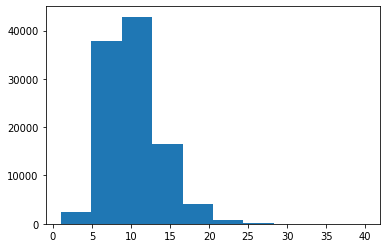

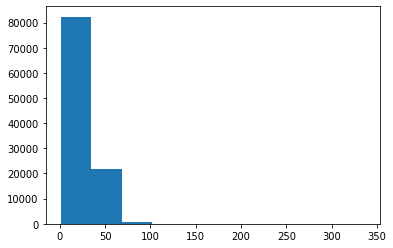

done! -----------------


In [4]:
config = "qnli"
print('processing', config, '...')
# store dataset and its information in its respective directory with splits train, val, test
dataset = datasets.load_dataset("glue", config)
print(dataset)
train_df = pd.DataFrame(dataset["train"])
val_df = pd.DataFrame(dataset["validation"])
# test_df = pd.DataFrame(dataset["test"])

test_df = val_df.sample(frac=0.2)
val_df = val_df.drop(test_df.index)

train_df.rename(columns={"question": "sentence1", "sentence": "sentence2"}, inplace=True)
val_df.rename(columns={"question": "sentence1", "sentence": "sentence2"}, inplace=True)
test_df.rename(columns={"question": "sentence1", "sentence": "sentence2"}, inplace=True)

info = asdict(load_dataset_builder("glue", config).info)
info["sentence1_max_length"] = 25
info["sentence2_max_length"] = 100
info["batch_size"] = 256
info["dataset_type"] = "nli"

if not os.path.exists(f"glue_data/{config}"):
    os.makedirs(f"glue_data/{config}")

train_df.to_csv(f"glue_data/{config}/train.csv", index=False)
val_df.to_csv(f"glue_data/{config}/val.csv", index=False)
test_df.to_csv(f"glue_data/{config}/test.csv", index=False)
with open(f"glue_data/{config}/info.json", "w") as f:
    json.dump(info, f)
    
plt.hist(train_df["sentence1"].apply(lambda x: len(x.split())))
plt.show()

plt.hist(train_df["sentence2"].apply(lambda x: len(x.split())))
plt.show()

print('done! -----------------')

processing qqp ...


Found cached dataset glue (/nas/home/souratih/.cache/huggingface/datasets/glue/qqp/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['question1', 'question2', 'label', 'idx'],
        num_rows: 363846
    })
    validation: Dataset({
        features: ['question1', 'question2', 'label', 'idx'],
        num_rows: 40430
    })
    test: Dataset({
        features: ['question1', 'question2', 'label', 'idx'],
        num_rows: 390965
    })
})


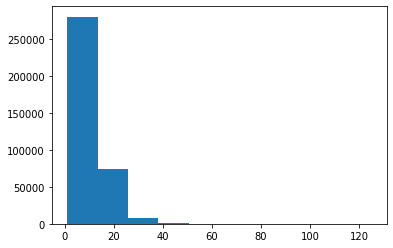

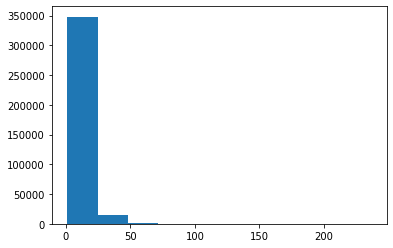

done! -----------------


In [5]:
config = "qqp"
print('processing', config, '...')
# store dataset and its information in its respective directory with splits train, val, test
dataset = datasets.load_dataset("glue", config)
print(dataset)
train_df = pd.DataFrame(dataset["train"])
val_df = pd.DataFrame(dataset["validation"])
# test_df = pd.DataFrame(dataset["test"])

test_df = val_df.sample(frac=0.2)
val_df = val_df.drop(test_df.index)

train_df.rename(columns={"question1": "sentence1", "question2": "sentence2"}, inplace=True)
val_df.rename(columns={"question1": "sentence1", "question2": "sentence2"}, inplace=True)
test_df.rename(columns={"question1": "sentence1", "question2": "sentence2"}, inplace=True)

info = asdict(load_dataset_builder("glue", config).info)
info["sentence1_max_length"] = 40
info["sentence2_max_length"] = 50
info["batch_size"] = 256
info["dataset_type"] = "nli"

if not os.path.exists(f"glue_data/{config}"):
    os.makedirs(f"glue_data/{config}")

train_df.to_csv(f"glue_data/{config}/train.csv", index=False)
val_df.to_csv(f"glue_data/{config}/val.csv", index=False)
test_df.to_csv(f"glue_data/{config}/test.csv", index=False)
with open(f"glue_data/{config}/info.json", "w") as f:
    json.dump(info, f)
    
plt.hist(train_df["sentence1"].apply(lambda x: len(x.split())))
plt.show()

plt.hist(train_df["sentence2"].apply(lambda x: len(x.split())))
plt.show()

print('done! -----------------')

processing rte ...


Found cached dataset glue (/nas/home/souratih/.cache/huggingface/datasets/glue/rte/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 2490
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 277
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3000
    })
})


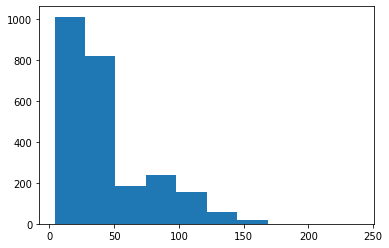

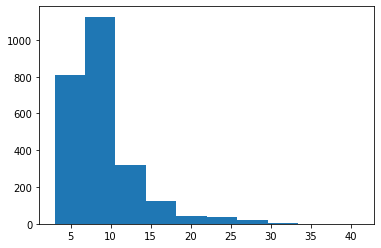

done! -----------------


In [6]:
config = "rte"
print('processing', config, '...')
# store dataset and its information in its respective directory with splits train, val, test
dataset = datasets.load_dataset("glue", config)
print(dataset)
train_df = pd.DataFrame(dataset["train"])
val_df = pd.DataFrame(dataset["validation"])
# test_df = pd.DataFrame(dataset["test"])

test_df = val_df.sample(frac=0.2)
val_df = val_df.drop(test_df.index)

info = asdict(load_dataset_builder("glue", config).info)
info["sentence1_max_length"] = 150
info["sentence2_max_length"] = 30
info["batch_size"] = 256
info["dataset_type"] = "nli"

if not os.path.exists(f"glue_data/{config}"):
    os.makedirs(f"glue_data/{config}")

train_df.to_csv(f"glue_data/{config}/train.csv", index=False)
val_df.to_csv(f"glue_data/{config}/val.csv", index=False)
test_df.to_csv(f"glue_data/{config}/test.csv", index=False)
with open(f"glue_data/{config}/info.json", "w") as f:
    json.dump(info, f)
    
plt.hist(train_df["sentence1"].apply(lambda x: len(x.split())))
plt.show()

plt.hist(train_df["sentence2"].apply(lambda x: len(x.split())))
plt.show()

print('done! -----------------')

processing sst2 ...


Found cached dataset glue (/nas/home/souratih/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
})


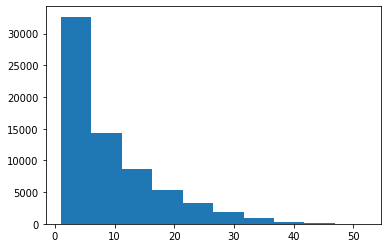

done! -----------------


In [7]:
config = "sst2"
print('processing', config, '...')
# store dataset and its information in its respective directory with splits train, val, test
dataset = datasets.load_dataset("glue", config)
print(dataset)
train_df = pd.DataFrame(dataset["train"])
val_df = pd.DataFrame(dataset["validation"])
# test_df = pd.DataFrame(dataset["test"])

test_df = val_df.sample(frac=0.2)
val_df = val_df.drop(test_df.index)

info = asdict(load_dataset_builder("glue", config).info)
info["sentence_max_length"] = 40
info["batch_size"] = 256
info["dataset_type"] = "classification"

if not os.path.exists(f"glue_data/{config}"):
    os.makedirs(f"glue_data/{config}")

train_df.to_csv(f"glue_data/{config}/train.csv", index=False)
val_df.to_csv(f"glue_data/{config}/val.csv", index=False)
test_df.to_csv(f"glue_data/{config}/test.csv", index=False)
with open(f"glue_data/{config}/info.json", "w") as f:
    json.dump(info, f)
    

plt.hist(train_df["sentence"].apply(lambda x: len(x.split())))
plt.show()

print('done! -----------------')

processing stsb ...


Found cached dataset glue (/nas/home/souratih/.cache/huggingface/datasets/glue/stsb/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 5749
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1500
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1379
    })
})


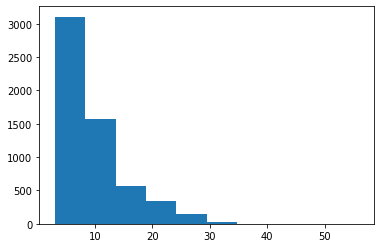

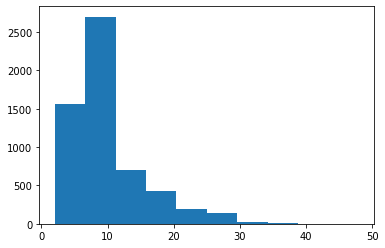

done! -----------------


In [8]:
config = "stsb"
print('processing', config, '...')
# store dataset and its information in its respective directory with splits train, val, test
dataset = datasets.load_dataset("glue", config)
print(dataset)
train_df = pd.DataFrame(dataset["train"])
val_df = pd.DataFrame(dataset["validation"])
# test_df = pd.DataFrame(dataset["test"])

test_df = val_df.sample(frac=0.2)
val_df = val_df.drop(test_df.index)

info = asdict(load_dataset_builder("glue", config).info)
info["sentence1_max_length"] = 30
info["sentence2_max_length"] = 30
info["batch_size"] = 256
info["dataset_type"] = "nli"

if not os.path.exists(f"glue_data/{config}"):
    os.makedirs(f"glue_data/{config}")

train_df.to_csv(f"glue_data/{config}/train.csv", index=False)
val_df.to_csv(f"glue_data/{config}/val.csv", index=False)
test_df.to_csv(f"glue_data/{config}/test.csv", index=False)
with open(f"glue_data/{config}/info.json", "w") as f:
    json.dump(info, f)
    
plt.hist(train_df["sentence1"].apply(lambda x: len(x.split())))
plt.show()

plt.hist(train_df["sentence2"].apply(lambda x: len(x.split())))
plt.show()

print('done! -----------------')

processing wnli ...


Found cached dataset glue (/nas/home/souratih/.cache/huggingface/datasets/glue/wnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 635
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 71
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 146
    })
})


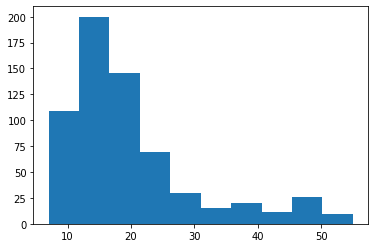

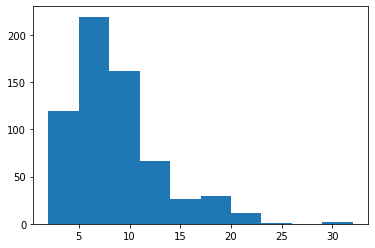

done! -----------------


In [9]:
config = "wnli"
print('processing', config, '...')
# store dataset and its information in its respective directory with splits train, val, test
dataset = datasets.load_dataset("glue", config)
print(dataset)
train_df = pd.DataFrame(dataset["train"])
val_df = pd.DataFrame(dataset["validation"])
# test_df = pd.DataFrame(dataset["test"])

test_df = val_df.sample(frac=0.2)
val_df = val_df.drop(test_df.index)

info = asdict(load_dataset_builder("glue", config).info)
info["sentence1_max_length"] = 50
info["sentence2_max_length"] = 30
info["batch_size"] = 256
info["dataset_type"] = "nli"

if not os.path.exists(f"glue_data/{config}"):
    os.makedirs(f"glue_data/{config}")

train_df.to_csv(f"glue_data/{config}/train.csv", index=False)
val_df.to_csv(f"glue_data/{config}/val.csv", index=False)
test_df.to_csv(f"glue_data/{config}/test.csv", index=False)
with open(f"glue_data/{config}/info.json", "w") as f:
    json.dump(info, f)
   
plt.hist(train_df["sentence1"].apply(lambda x: len(x.split())))
plt.show()

plt.hist(train_df["sentence2"].apply(lambda x: len(x.split())))
plt.show() 

print('done! -----------------')